In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
end=datetime.now()
start=datetime(end.year-15, end.month, end.day)
stock='BTC-USD'
stock_data=yf.download(stock, start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-05-25,109035.390625,109313.304688,106683.375000,107802.273438,47518041841
2025-05-26,109440.367188,110376.882812,108735.640625,109023.781250,45950461571
2025-05-27,108994.640625,110744.210938,107609.554688,109440.406250,57450176272
2025-05-28,107802.328125,109298.289062,106812.929688,108992.171875,49155377493
2025-05-29,107624.156250,108888.390625,106512.859375,107796.335938,53621477376


In [9]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3908.000000,3908.000000,3908.000000,3908.000000,3.908000e+03
mean,22422.792142,22886.423301,21885.111083,22396.525397,1.952080e+10
std,26015.677026,26516.047113,25432.287602,25983.633055,2.093283e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1996.072479,2078.239990,1881.644989,1971.334991,8.541473e+08
50%,9806.281250,10009.243652,9587.851562,9795.269531,1.572488e+10
75%,36605.031250,37516.359375,35074.913086,36595.666992,3.077772e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3908 entries, 2014-09-17 to 2025-05-29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3908 non-null   float64
 1   (High, BTC-USD)    3908 non-null   float64
 2   (Low, BTC-USD)     3908 non-null   float64
 3   (Open, BTC-USD)    3908 non-null   float64
 4   (Volume, BTC-USD)  3908 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 183.2 KB


In [13]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [15]:
# Closing price data
closing_price=stock_data[['Close']]

In [17]:
closing_price.head()

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [64]:
# Save to CSV
closing_price.to_csv('C:/Bitcoin_Price_Prediction/Data/stock_prices.csv')

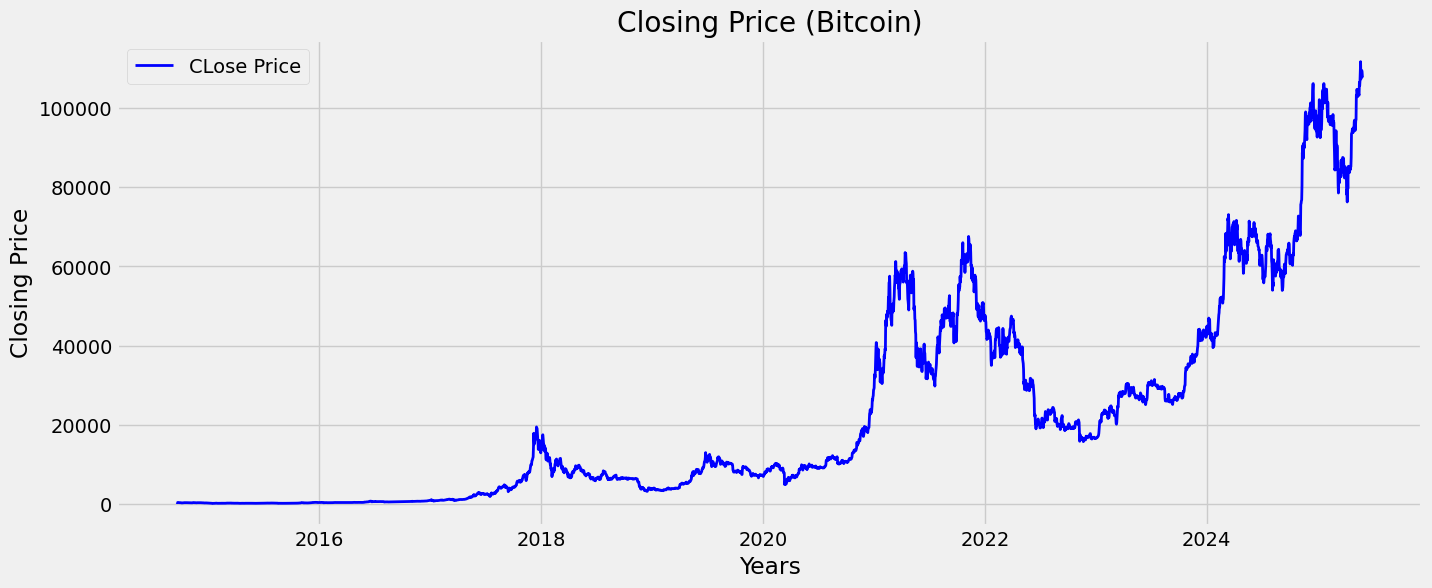

In [19]:
# Plot closing price with enhancement
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label='CLose Price', color='blue', linewidth=2)
plt.title('Closing Price (Bitcoin)')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.legend()
plt.show() 

In [21]:
# Moving_Average
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [23]:
closing_price['MA_365']=closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100']=closing_price['Close'].rolling(window=100).mean()

C:\Users\suraj\AppData\Local\Temp\ipykernel_5940\153895848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365']=closing_price['Close'].rolling(window=365).mean()
C:\Users\suraj\AppData\Local\Temp\ipykernel_5940\153895848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100']=closing_price['Close'].rolling(window=100).mean()


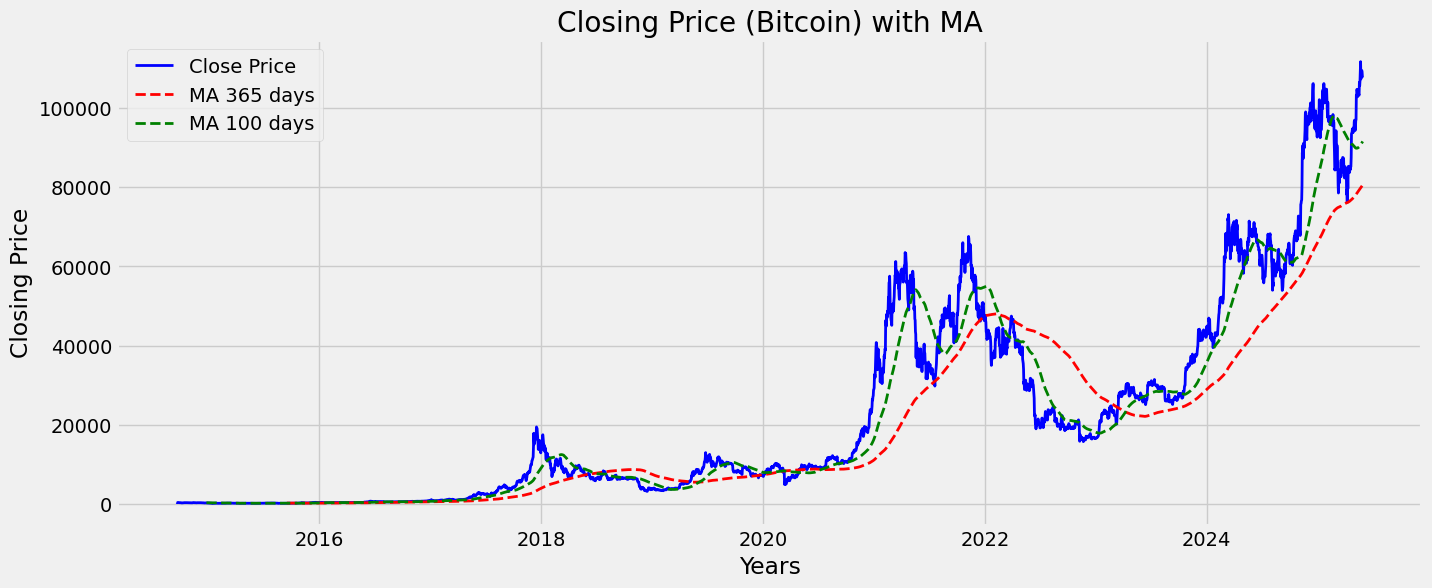

In [25]:
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'], label='MA 365 days', color='red', linestyle='--',linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'], label='MA 100 days', color='green', linestyle='--',linewidth=2)
plt.title('Closing Price (Bitcoin) with MA')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.legend()
plt.show() 

In [27]:
# LSTM
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(closing_price[['Close']].dropna())

In [29]:
scaled_data

array([[0.00250442],
       [0.0022094 ],
       [0.00194352],
       ...,
       [0.97597528],
       [0.96528143],
       [0.96368341]])

In [31]:
!pip install keras
!pip install tensorflow

In [32]:
from keras.models import Sequential

In [33]:
from keras.layers import Dense, LSTM

In [34]:
#Preaparing data for LSTM
x_data=[]
y_data=[]
base_days=100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data=np.array(x_data)
y_data=np.array(y_data)

In [35]:
# Split into train and test
train_data=int(len(x_data)*0.9)
x_train, y_train = x_data[:train_data], y_data[:train_data]
x_test, y_test = x_data[train_data:], y_data[train_data:]

In [36]:
model= Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10

686/686 [==============================] - 32s 42ms/step - loss: 5.7616e-04
Epoch 2/10
686/686 [==============================] - 29s 42ms/step - loss: 2.2398e-04
Epoch 3/10
686/686 [==============================] - 30s 44ms/step - loss: 1.6982e-04
Epoch 4/10
686/686 [==============================] - 31s 45ms/step - loss: 1.4447e-04
Epoch 5/10
686/686 [==============================] - 30s 44ms/step - loss: 1.5343e-04
Epoch 6/10
686/686 [==============================] - 30s 44ms/step - loss: 1.1309e-04
Epoch 7/10
686/686 [==============================] - 31s 45ms/step - loss: 1.0584e-04
Epoch 8/10
686/686 [==============================] - 33s 48ms/step - loss: 1.3449e-04
Epoch 9/10
686/686 [==============================] - 32s 46ms/step - loss: 1.1425e-04
Epoch 10/10
686/686 [==============================] - 32s 47ms/step - loss: 1.1444e-04


In [46]:
predictions=model.predict(x_test)
inv_predictions=scaler.inverse_transform(predictions)
inv_y_test=scaler.inverse_transform(y_test)

12/12 [==============================] - 1s 25ms/step


In [48]:
inv_predictions

array([[ 66710.28 ],
       [ 65345.098],
       [ 70324.484],
       [ 69410.86 ],
       [ 71225.81 ],
       [ 71097.08 ],
       [ 70276.43 ],
       [ 75865.21 ],
       [ 74525.72 ],
       [ 73220.48 ],
       [ 71815.805],
       [ 72428.11 ],
       [ 73291.195],
       [ 72502.79 ],
       [ 73437.555],
       [ 72270.97 ],
       [ 71450.16 ],
       [ 72318.445],
       [ 71428.11 ],
       [ 71649.16 ],
       [ 71734.37 ],
       [ 72905.6  ],
       [ 74882.21 ],
       [ 75462.27 ],
       [ 75036.17 ],
       [ 73402.73 ],
       [ 73299.734],
       [ 73696.08 ],
       [ 73573.95 ],
       [ 71187.04 ],
       [ 72134.59 ],
       [ 70608.3  ],
       [ 69781.836],
       [ 70010.734],
       [ 70567.65 ],
       [ 70458.83 ],
       [ 68998.5  ],
       [ 68762.36 ],
       [ 68653.266],
       [ 67890.95 ],
       [ 68054.74 ],
       [ 66940.49 ],
       [ 63806.36 ],
       [ 65328.45 ],
       [ 64449.695],
       [ 65284.387],
       [ 63997.043],
       [ 6453

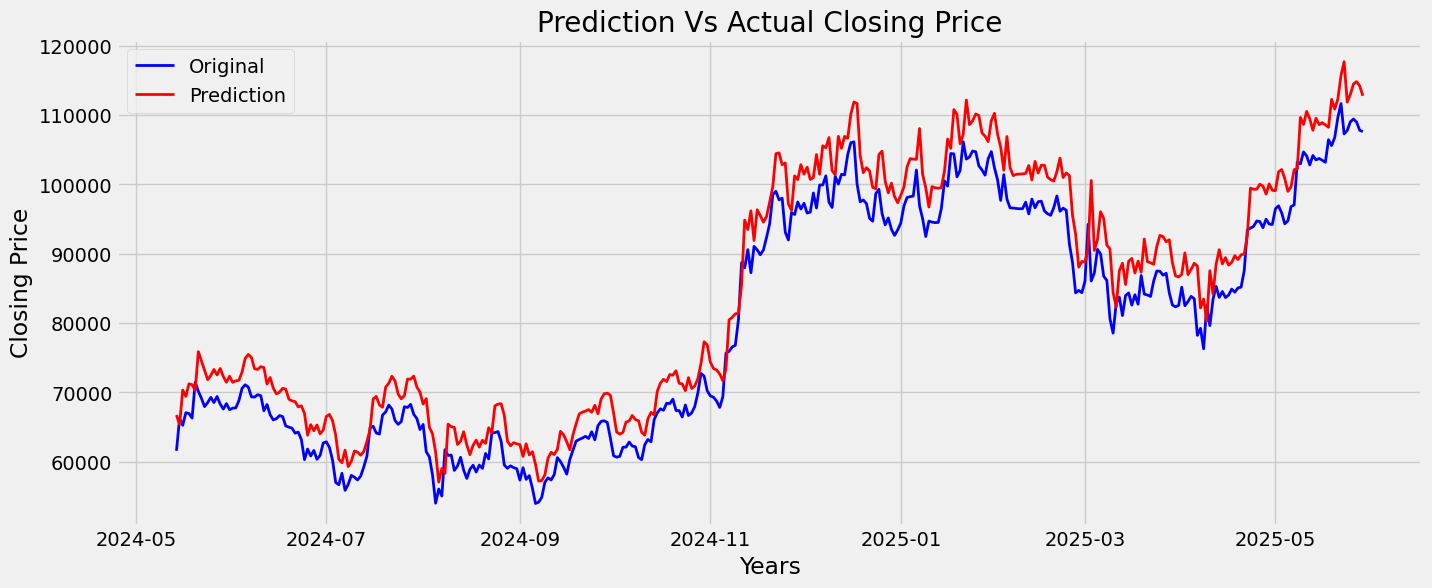

In [50]:
plotting_data=pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten()
    }, index= closing_price.index[train_data+base_days:]
)

plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'], label='Original', color='blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label='Prediction', color='red', linewidth=2)
plt.title('Prediction Vs Actual Closing Price')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.legend()
plt.show() 

In [54]:
#Predict future days
last_100=scaled_data[-100:].reshape(1,-1,1)
future_predictions=[]
for i in range(10):
    next_days=model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100=np.append(last_100[:, 1:, :], next_days.reshape(1,1,-1), axis=1)

1/1 [==============================] - 0s 25ms/step


In [58]:
future_predictions

[array([[112731.38]], dtype=float32),
 array([[119113.08]], dtype=float32),
 array([[126387.68]], dtype=float32),
 array([[134398.72]], dtype=float32),
 array([[142988.2]], dtype=float32),
 array([[151971.34]], dtype=float32),
 array([[161131.8]], dtype=float32),
 array([[170225.23]], dtype=float32),
 array([[178990.9]], dtype=float32),
 array([[187171.44]], dtype=float32)]

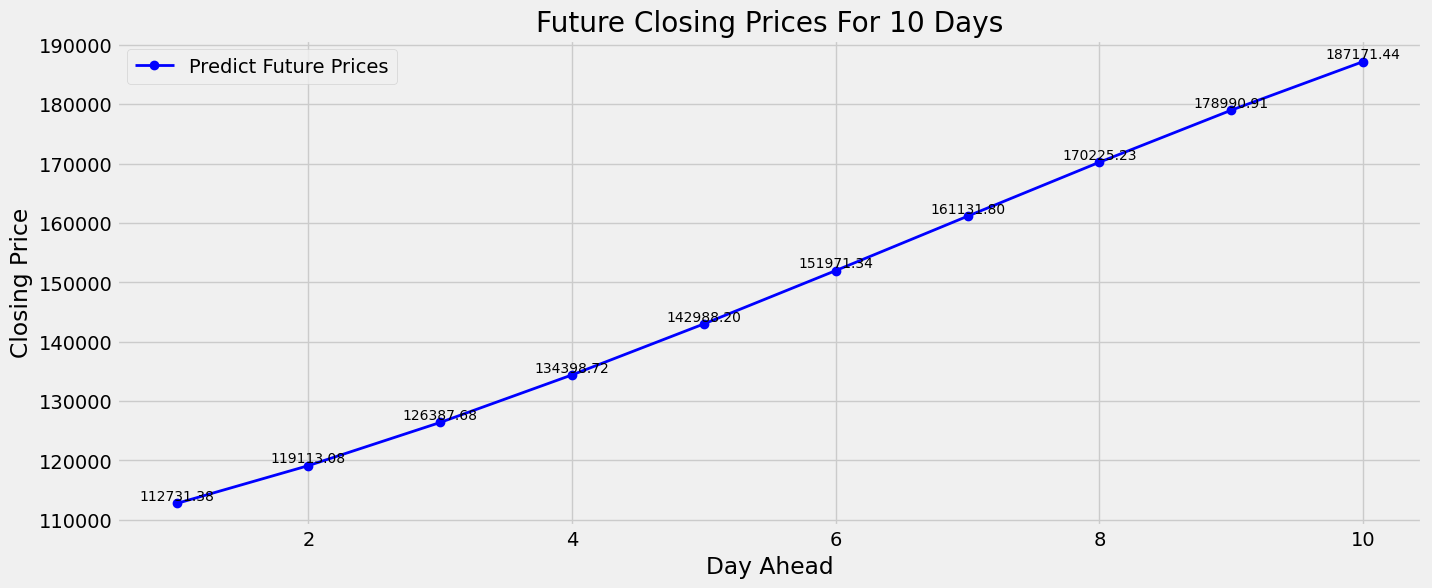

In [60]:
future_predictions=np.array(future_predictions).flatten()
plt.figure(figsize=(15,6))
plt.plot(range(1,11), future_predictions, marker='o', label='Predict Future Prices', color='blue', linewidth=2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val, f'{val:.2f}', fontsize=10, ha='center', va='bottom', color='black')
plt.title('Future Closing Prices For 10 Days')
plt.xlabel('Day Ahead')
plt.ylabel('Closing Price')
plt.legend()
plt.show() 

In [62]:
model.save("model.keras")

In [1]:
from tensorflow.keras.models import load_model

# Load existing model (even if legacy)
model = load_model("C:/Bitcoin_Price_Prediction/Streamlit/model.keras", compile=False)

In [3]:
# Recompile if needed
model.compile(optimizer='adam', loss='mse')

import os
# Make sure the Streamlit folder exists
os.makedirs("C:/Bitcoin_Price_Prediction/Streamlit", exist_ok=True)

In [5]:
# Save the updated model in the same folder with a new name
model.save("model_v2.h5")

C:\Users\suraj\tf-env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
